# Preface

Nama: Karmenia Ditabaya Lontoh

Batch: HCK-021

Objectives: Saya adalah Data Scientist baru di Amerika Serikat. Menyadari tingginya biaya perawatan kesehatan, saya tertarik untuk mendapatkan asuransi kesehatan. Namun, saya tidak tahu estimasi premi yang harus dibayar. Saya berencana memprediksi biaya premi asuransi dengan model Machine Learning berdasarkan data biaya asuransi dari publik.

# Problem Identification

## SMART Framework

1. **Specific**: Membangun model Machine Learning untuk memprediksi premi asuransi kesehatan tahunan berdasarkan variabel seperti usia, jenis kelamin, BMI, jumlah anak, status merokok, dan wilayah.

2. **Measurable**: Kesuksesan diukur dengan metrik dengan target meminimalkan error prediksi.

3. **Achievable**: Model menggunakan dataset publik dengan 1,338 entri dan menerapkan algoritma regresi yang sesuai.

4. **Relevant**: Prediksi premi asuransi penting untuk membantu individu dalam perencanaan keuangan dan biaya kesehatan di AS.

5. **Time-bound**: Proyek akan diselesaikan dalam ... bulan, termasuk pengembangan model dan evaluasi.

## Problem Statement

Memprediksi premi asuransi kesehatan tahunan menggunakan model Machine Learning berdasarkan variabel seperti usia, jenis kelamin, BMI, jumlah anak, dan status merokok, untuk membantu individu memahami dan mengelola biaya perawatan kesehatan.

## Machine Learning Model

Dalam pengembangan machine learning ini, model regresi digunakan untuk memprediksi harga premi. Regresi memungkinkan pemahaman dan prediksi hubungan antara variabel-variabel seperti usia, BMI, status perokok, dan wilayah dengan harga premi. Model regresi efektif dalam memprediksi nilai kontinu seperti premi asuransi berdasarkan data pelanggan, serta mengidentifikasi pola risiko yang mempengaruhi biaya premi.

# Libraries

Dalam pengembangan machine learning, dibutuhkan libraries berikut:

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

Import libraries berhasil dilakukan.

# Data Loading

Dataset yang digunakan dalam pengembangan machine learning dapat dimuat ke dalam program menggunakan fungsi untuk membaca file CSV.

In [60]:
df = pd.read_csv('https://raw.githubusercontent.com/FTDS-learning-materials/datasets/main/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Dataset berhasil disimpan pada variabel df.

# Data Exploration

## Summary Information

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Berdasarkan ringkasan informasi, didapatkan insight sebagai berikut:

1. Jumlah entri: Terdapat 1.338 entri dalam dataset, menunjukkan ukuran sampel yang cukup untuk analisis.
2. Tidak ada missing values: Semua kolom memiliki nilai lengkap, meningkatkan kualitas data dan keandalan analisis.
3. Kolom numerik: Terdapat dua kolom numerik (age dan bmi) dan satu kolom target (charges) yang dapat digunakan untuk analisis regresi.
4. Kolom kategorikal: Terdapat tiga kolom kategorikal (sex, smoker, dan region) yang dapat dianalisis untuk memahami pengaruh demografis terhadap biaya premi.
5. Kesiapan untuk analisis: Kualitas data yang baik menunjukkan kesiapan untuk analisis lebih lanjut dan pemodelan machine learning.

In [62]:
# Mengecek 5 nilai unik pertama di setiap kolom
unique_values = df.apply(lambda x: x.unique()[:10])

# Menampilkan 5 nilai unik pertama di setiap kolom
for column, values in unique_values.items():
    print(f"'{column}': {values.tolist()}")

'age': [19, 18, 28, 33, 32, 31, 46, 37, 60, 25]
'sex': ['female', 'male']
'bmi': [27.9, 33.77, 33.0, 22.705, 28.88, 25.74, 33.44, 27.74, 29.83, 25.84]
'children': [0, 1, 3, 2, 5, 4]
'smoker': ['yes', 'no']
'region': ['southwest', 'southeast', 'northwest', 'northeast']
'charges': [16884.924, 1725.5523, 4449.462, 21984.47061, 3866.8552, 3756.6216, 8240.5896, 7281.5056, 6406.4107, 28923.13692]


Berdasarkan data yang disediakan, berikut adalah insight singkat:

1. Variasi Umur: Rentang umur dari 18 hingga 60 tahun menunjukkan keragaman profil risiko.
2. BMI Beragam: Nilai BMI antara 22,705 dan 33,77 menunjukkan potensi risiko kesehatan yang berbeda.
3. Jumlah Anak: Beberapa individu tidak memiliki anak, sementara yang lain memiliki hingga lima anak, mempengaruhi biaya premi.
4. Status Merokok: Ada perbedaan biaya premi yang signifikan antara perokok dan non-perokok.
5. Distribusi Wilayah: Data mencakup beberapa wilayah yang dapat memengaruhi biaya premi.
6. Biaya Premi Beragam: Variasi biaya premi dari 1.725,55 hingga 28.923,14 menunjukkan potensi risiko yang kompleks.
7. Pola Risiko: Dataset dapat dianalisis untuk memahami pola risiko terkait biaya premi asuransi.
8. Data cleaning: Dataset ini tidak memerlukan data cleaning karena semua kolom memiliki tipe data yang sesuai, format nilai yang konsisten, tidak ada nilai kosong, outlier terkelola, dan tidak terdapat duplikasi.

In [63]:
# Cek statistik sederhana pada dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


# Exploratory Data Analysis (EDA)

## Functions

Untuk mempermudah proses eksplorasi data (EDA), maka, dibuat fungsi untuk memeriksa outlier, menganalisis distribusi variabel, dan mengecek missing value.

### Function Cek Outlier

In [64]:
def cek_outlier(column):
    print(f"\n{'====='*40}")  # Pemisah antar variabel
    print(f"\nAnalisis Outlier untuk Kolom: '{column.name}'")
    
    if pd.api.types.is_numeric_dtype(column):
        # Cek skewness
        skew_value = column.skew()
        
        # Untuk distribusi normal (skewness < |±0.5|)
        if abs(skew_value) < 0.5:
            print(f"Distribusi Kolom '{column.name}' dianggap normal (Skewness = {skew_value:.3f})")
            mean = column.mean()
            std = column.std()
            
            # Hitung batas untuk outlier menggunakan Z-Score
            upper_bound = mean + 3 * std
            lower_bound = mean - 3 * std
            
            # Hitung jumlah dan persentase outlier
            outliers_z = column[(column > upper_bound) | (column < lower_bound)]
            outlier_count_z = outliers_z.count()
            total_count = column.count()
            outlier_percentage_z = (outlier_count_z / total_count) * 100
            
            # Tampilkan boxplot
            plt.figure(figsize=(10, 5))
            sns.boxplot(x=column)
            plt.title(f"Boxplot Kolom '{column.name}' (Z-Score)")
            plt.xlabel(column.name)
            plt.show()
            
            # Tampilkan informasi outlier
            print(f"Jumlah Outlier (Z-Score): {outlier_count_z} dari {total_count} total data")
            print(f"Persentase Outlier (Z-Score): {outlier_percentage_z:.2f}%")
        
        # Untuk distribusi skewed (skewness > |±0.5|)
        else:
            print(f"Distribusi Kolom '{column.name}' tidak normal (Skewness = {skew_value:.3f})")
            Q1 = column.quantile(0.25)
            Q3 = column.quantile(0.75)
            IQR = Q3 - Q1
            
            # Hitung batas untuk outlier menggunakan Tukey's Rule
            upper_bound = Q3 + 1.5 * IQR
            lower_bound = Q1 - 1.5 * IQR
            
            # Hitung jumlah dan persentase outlier
            outliers_tukey = column[(column > upper_bound) | (column < lower_bound)]
            outlier_count_tukey = outliers_tukey.count()
            total_count = column.count()
            outlier_percentage_tukey = (outlier_count_tukey / total_count) * 100
            
            # Tampilkan boxplot
            plt.figure(figsize=(10, 5))
            sns.boxplot(x=column)
            plt.title(f"Boxplot Kolom '{column.name}' (Tukey's Rule)")
            plt.xlabel(column.name)
            plt.show()
            
            # Tampilkan informasi outlier
            print(f"Jumlah Outlier (Tukey's Rule): {outlier_count_tukey} dari {total_count} total data")
            print(f"Persentase Outlier (Tukey's Rule): {outlier_percentage_tukey:.2f}%")

Fungsi `cek_outlier` digunakan untuk menganalisis outlier dalam sebuah kolom pada DataFrame. Fungsi ini mengidentifikasi dan menghitung jumlah serta persentase outlier berdasarkan dua metode: **Z-Score** untuk distribusi normal dan **Tukey's Rule** untuk distribusi yang skewed. Berikut adalah penjelasan detail tentang bagaimana fungsi ini bekerja:

**Cara Kerja**

1. **Pemisah Output**:
   - Fungsi dimulai dengan mencetak pemisah untuk meningkatkan keterbacaan output.
   - Menampilkan nama kolom yang sedang dianalisis.

2. **Memeriksa Tipe Data**:
   - Fungsi memeriksa apakah kolom yang dianalisis adalah tipe numerik menggunakan `pd.api.types.is_numeric_dtype()`.

3. **Menghitung Skewness**:
   - Skewness kolom dihitung untuk menentukan apakah distribusi kolom tersebut normal atau tidak. 
   - Jika nilai skewness kurang dari |±0.5|, kolom dianggap memiliki distribusi normal.

4. **Distribusi Normal (Z-Score)**:
   - Jika kolom dianggap normal:
     - Rata-rata dan standar deviasi kolom dihitung.
     - Batas atas dan bawah untuk outlier dihitung menggunakan Z-Score: 
       - **Upper Bound**: `mean + 3 * std`
       - **Lower Bound**: `mean - 3 * std`
     - Jumlah dan persentase outlier dihitung dan ditampilkan.
     - Boxplot kolom ditampilkan untuk visualisasi outlier.

5. **Distribusi Skewed (Tukey's Rule)**:
   - Jika kolom tidak normal:
     - Kuartil pertama (Q1) dan kuartil ketiga (Q3) dihitung untuk menentukan IQR (Interquartile Range):
       - **IQR**: `Q3 - Q1`
     - Batas atas dan bawah untuk outlier dihitung menggunakan Tukey’s Rule:
       - **Upper Bound**: `Q3 + 1.5 * IQR`
       - **Lower Bound**: `Q1 - 1.5 * IQR`
     - Jumlah dan persentase outlier dihitung dan ditampilkan.
     - Boxplot kolom ditampilkan untuk visualisasi outlier.

### Function Cek Distribusi

In [65]:
def cek_distribusi(column):
    print(f"\n{'====='*40}")  # Pemisah antar variabel
    print(f"\nAnalisis untuk Kolom: '{column.name}'")
    
    if pd.api.types.is_numeric_dtype(column):
        # Cek skewness
        skew_value = column.skew()
        
        # Histogram dan KDE
        plt.figure(figsize=(10, 5))
        sns.histplot(column, kde=True, bins=30)
        plt.axvline(column.mean(), color='r', linestyle='--', label='Mean')
        plt.axvline(column.median(), color='g', linestyle='--', label='Median')
        plt.axvline(column.mode()[0], color='b', linestyle='--', label='Mode')
        
        plt.title(f"Distribusi Kolom '{column.name}' (Skewness = {skew_value:.3f})")
        plt.xlabel(column.name)
        plt.ylabel('Frekuensi')
        plt.legend()
        plt.show()
        
        # Menentukan distribusi normal atau tidak
        if abs(skew_value) < 0.5:
            print(f"Distribusi Kolom '{column.name}': Normal (Skewness = {skew_value:.3f})")
        else:
            print(f"Distribusi Kolom '{column.name}': Tidak Normal (Skewness = {skew_value:.3f})")
    
    elif pd.api.types.is_object_dtype(column):
        # Plot frekuensi untuk kolom objek
        plt.figure(figsize=(10, 5))
        value_counts = column.value_counts()
        sns.barplot(x=value_counts.index, y=value_counts.values)
        
        plt.title(f"Frekuensi Kolom '{column.name}'")
        plt.xlabel(column.name)
        plt.ylabel('Frekuensi')
        plt.xticks(rotation=45)
        plt.show()
        
        unique_values = column.nunique()
        print(f"Kolom '{column.name}' memiliki {unique_values} nilai unik (Tipe: Object)")
    
    else:
        print(f"Kolom '{column.name}' tidak teridentifikasi sebagai numerik atau objek.")

Fungsi `cek_distribusi` digunakan untuk menganalisis distribusi dari kolom dalam sebuah DataFrame. Fungsi ini dapat menangani kolom dengan tipe numerik dan objek, serta menyediakan visualisasi dan informasi terkait distribusi data. Berikut adalah penjelasan detail tentang bagaimana fungsi ini bekerja:

Cara Kerja

1. **Pemisah Output**:
   - Fungsi dimulai dengan mencetak pemisah untuk meningkatkan keterbacaan output.
   - Menampilkan nama kolom yang sedang dianalisis.

2. **Memeriksa Tipe Data**:
   - Fungsi memeriksa apakah kolom yang dianalisis adalah tipe numerik atau objek menggunakan `pd.api.types.is_numeric_dtype()` dan `pd.api.types.is_object_dtype()`.

3. **Analisis untuk Kolom Numerik**:
   - **Menghitung Skewness**: Skewness kolom dihitung untuk menentukan apakah distribusi kolom tersebut normal atau tidak.
   - **Visualisasi Histogram dan KDE**:
     - Histogram dan Kernel Density Estimate (KDE) dari kolom ditampilkan.
     - Garis vertikal ditambahkan untuk menunjukkan nilai rata-rata (mean), median, dan modus (mode).
   - **Menentukan Distribusi**:
     - Jika nilai skewness kurang dari |±0.5|, distribusi dianggap normal.
     - Jika tidak, distribusi dianggap tidak normal, dan informasi tersebut ditampilkan.

4. **Analisis untuk Kolom Objek**:
   - Jika kolom adalah tipe objek:
     - Plot frekuensi nilai-nilai unik dalam kolom ditampilkan menggunakan barplot.
     - Menampilkan jumlah nilai unik yang terdapat dalam kolom.


### Function Cek Missing Value

In [66]:
def cek_missing_values(df):
    print(f"\n{'====='*40}")  # Pemisah antar variabel
    print("Analisis Missing Values:")
    
    # Hitung jumlah missing values
    missing_counts = df.isnull().sum()
    
    # Hitung persentase missing values
    total_count = df.shape[0]
    missing_percentage = (missing_counts / total_count) * 100
    
    # Buat DataFrame untuk menampilkan hasil
    missing_summary = pd.DataFrame({
        'Jumlah Missing': missing_counts,
        'Persentase Missing (%)': missing_percentage
    })
    
    # Tampilkan hanya kolom dengan nilai yang hilang
    missing_summary = missing_summary[missing_summary['Jumlah Missing'] > 0]
    
    # Tampilkan hasil
    if missing_summary.empty:
        print("Tidak ada nilai yang hilang dalam DataFrame.")
    else:
        print(missing_summary)

Fungsi ini bertujuan untuk menganalisis nilai yang hilang (missing values) dalam DataFrame yang diberikan. Berikut adalah langkah-langkah yang dilakukan dalam fungsi ini:

1. **Pemisah Antara Variabel**: Mencetak garis pemisah untuk memudahkan pembacaan output.
2. **Analisis Missing Values**: Menampilkan header untuk analisis nilai yang hilang.
3. **Menghitung Jumlah Missing Values**: 
   - Menggunakan `isnull().sum()` untuk menghitung jumlah nilai yang hilang pada setiap kolom dalam DataFrame.
4. **Menghitung Persentase Missing Values**: 
   - Menghitung persentase nilai yang hilang berdasarkan total jumlah baris dalam DataFrame.
5. **Membuat DataFrame Ringkasan**: 
   - Menggabungkan jumlah dan persentase nilai yang hilang ke dalam DataFrame baru bernama `missing_summary`.
6. **Filter DataFrame untuk Menampilkan Kolom yang Memiliki Nilai Hilang**: 
   - Menyaring `missing_summary` untuk hanya menampilkan kolom yang memiliki nilai yang hilang.
7. **Menampilkan Hasil**: 
   - Jika tidak ada nilai yang hilang, mencetak pesan yang menyatakan bahwa tidak ada nilai yang hilang.
   - Jika ada nilai yang hilang, mencetak ringkasan dari jumlah dan persentase nilai yang hilang.


In [67]:
def check_duplicates(df, subset=None):

    # Check for duplicate rows
    duplicate_rows = df[df.duplicated(subset=subset)]
    
    # Count the number of duplicate rows
    num_duplicates = duplicate_rows.shape[0]
    
    # Return the duplicate rows and the count
    return duplicate_rows, num_duplicates


### Function All

In [68]:
def analisis_kolom(df):
    # Dataframe untuk menyimpan hasil akhir
    result_data = []  # Simpan data dalam list, baru diubah ke DataFrame di akhir

    # Looping setiap kolom
    for column_name in df.columns:
        column = df[column_name]
        
        # Analisis Missing Values
        missing_count = column.isnull().sum()
        missing_percentage = (missing_count / len(column)) * 100
        
        # Analisis Outlier
        if pd.api.types.is_numeric_dtype(column) and column.notnull().all():
            # Cek skewness
            skew_value = column.skew()
            
            if abs(skew_value) < 0.5:
                # Distribusi normal, menggunakan Z-Score untuk outlier
                mean = column.mean()
                std = column.std()
                upper_bound = mean + 3 * std
                lower_bound = mean - 3 * std
                outliers = column[(column > upper_bound) | (column < lower_bound)]
            else:
                # Distribusi skewed, menggunakan Tukey's Rule untuk outlier
                Q1 = column.quantile(0.25)
                Q3 = column.quantile(0.75)
                IQR = Q3 - Q1
                upper_bound = Q3 + 1.5 * IQR
                lower_bound = Q1 - 1.5 * IQR
                outliers = column[(column > upper_bound) | (column < lower_bound)]
            
            outlier_count = len(outliers)
            outlier_percentage = round((outlier_count / len(column)) * 100, 2)
        else:
            outlier_count = 0
            outlier_percentage = 0
        
        # Analisis Distribusi
        if pd.api.types.is_numeric_dtype(column):
            skew_value = column.skew()
            if abs(skew_value) < 0.5:
                distribusi = 'Normal'
            else:
                distribusi = 'Tidak Normal'
        elif pd.api.types.is_object_dtype(column):
            distribusi = f"{column.nunique()} Nilai Unik"
        else:
            distribusi = 'Tidak Dikenal'
        
        # Tambahkan hasil analisis ke list
        result_data.append({
            'Kolom': column_name,
            'Jumlah Missing': missing_count,
            'Persentase Missing': missing_percentage,
            'Jumlah Outlier': outlier_count,
            'Persentase Outlier': outlier_percentage,
            'Distribusi': distribusi
        })
    # Menyimpan hasil analisis ke dataframe
    result_df = pd.DataFrame(result_data)

    return result_df

Fungsi ini bertujuan untuk menganalisis setiap kolom dalam DataFrame yang diberikan, dengan fokus pada nilai yang hilang, outlier, dan distribusi data. Berikut adalah langkah-langkah yang dilakukan dalam fungsi ini:

1. **Inisialisasi Hasil Akhir**:
   - Membuat list kosong `result_data` untuk menyimpan hasil analisis untuk setiap kolom.

2. **Looping Setiap Kolom**:
   - Melakukan iterasi melalui setiap kolom dalam DataFrame.

3. **Analisis Missing Values**:
   - Menghitung jumlah nilai yang hilang menggunakan `isnull().sum()`.
   - Menghitung persentase nilai yang hilang berdasarkan total jumlah baris.

4. **Analisis Outlier**:
   - Memeriksa apakah kolom memiliki tipe data numerik dan tidak mengandung nilai hilang.
   - Menghitung nilai skewness kolom untuk menentukan distribusi data.
   - Jika distribusi normal (skewness < 0.5), menggunakan Z-Score untuk mendeteksi outlier.
   - Jika distribusi skewed, menggunakan Tukey's Rule untuk mendeteksi outlier.
   - Menghitung jumlah dan persentase outlier.

5. **Analisis Distribusi**:
   - Menentukan jenis distribusi untuk kolom numerik dan objek.
   - Mengkategorikan kolom numerik sebagai 'Normal' atau 'Tidak Normal' berdasarkan nilai skewness.
   - Menghitung jumlah nilai unik untuk kolom objek.

6. **Menyimpan Hasil Analisis**:
   - Menambahkan hasil analisis untuk setiap kolom ke dalam list `result_data`.

## Distribusi Variabel



Analisis untuk Kolom: 'age'


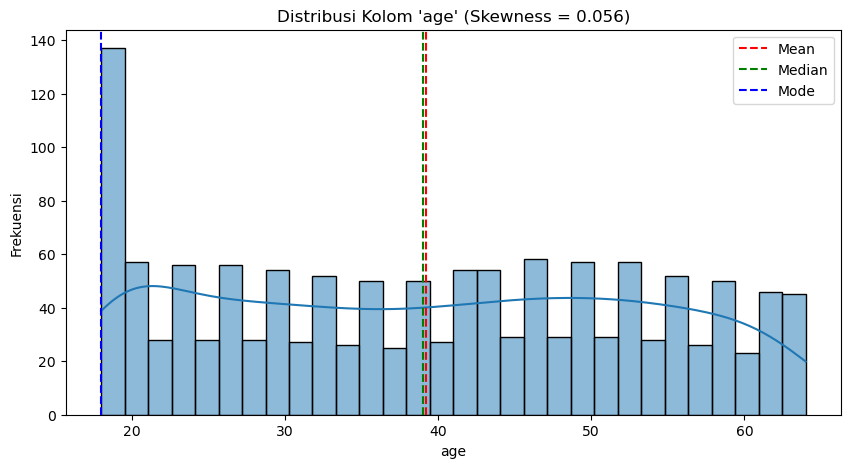

Distribusi Kolom 'age': Normal (Skewness = 0.056)


Analisis untuk Kolom: 'sex'


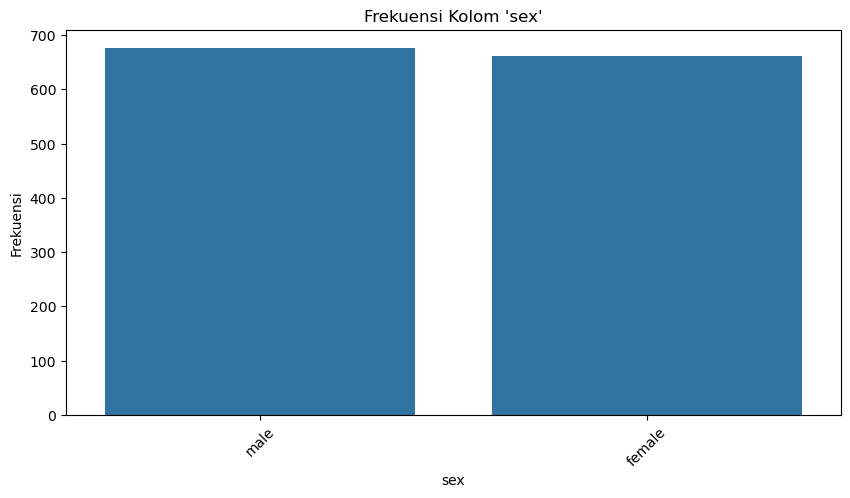

Kolom 'sex' memiliki 2 nilai unik (Tipe: Object)


Analisis untuk Kolom: 'bmi'


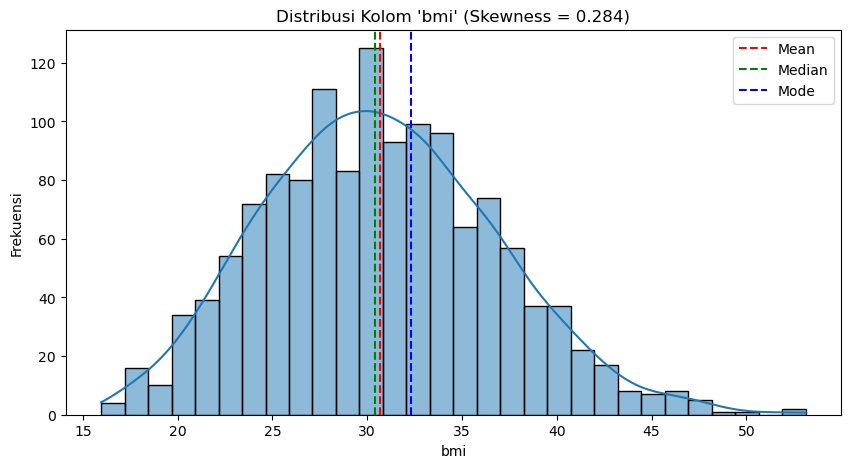

Distribusi Kolom 'bmi': Normal (Skewness = 0.284)


Analisis untuk Kolom: 'children'


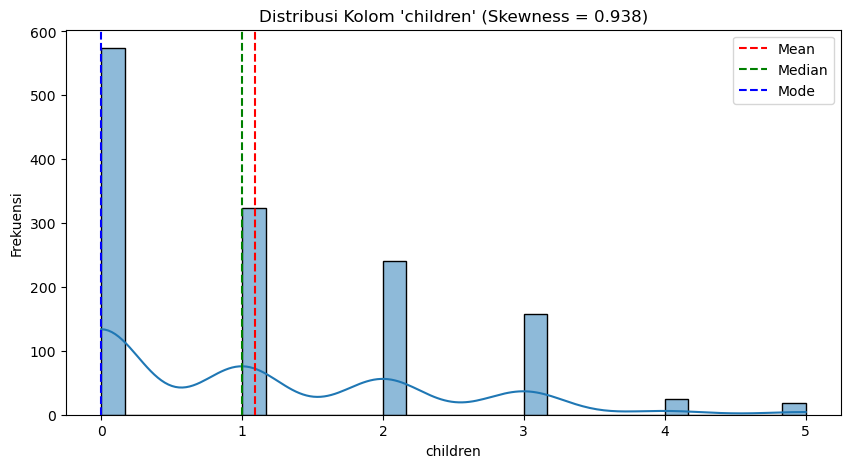

Distribusi Kolom 'children': Tidak Normal (Skewness = 0.938)


Analisis untuk Kolom: 'smoker'


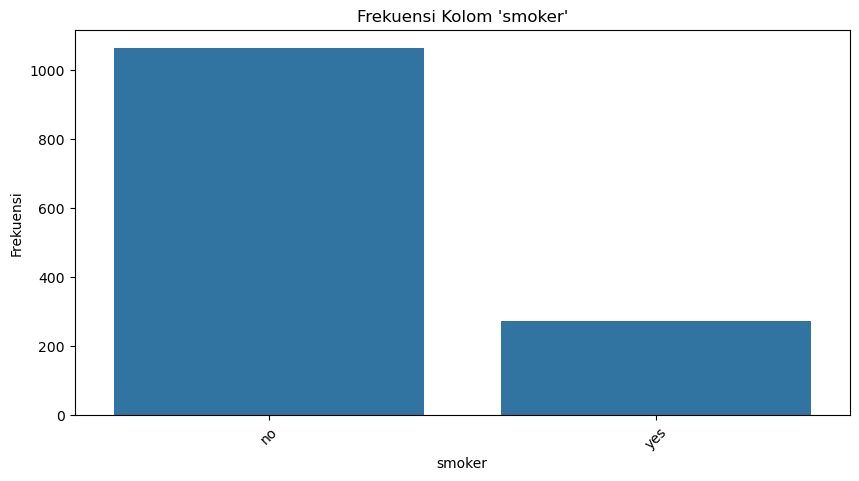

Kolom 'smoker' memiliki 2 nilai unik (Tipe: Object)


Analisis untuk Kolom: 'region'


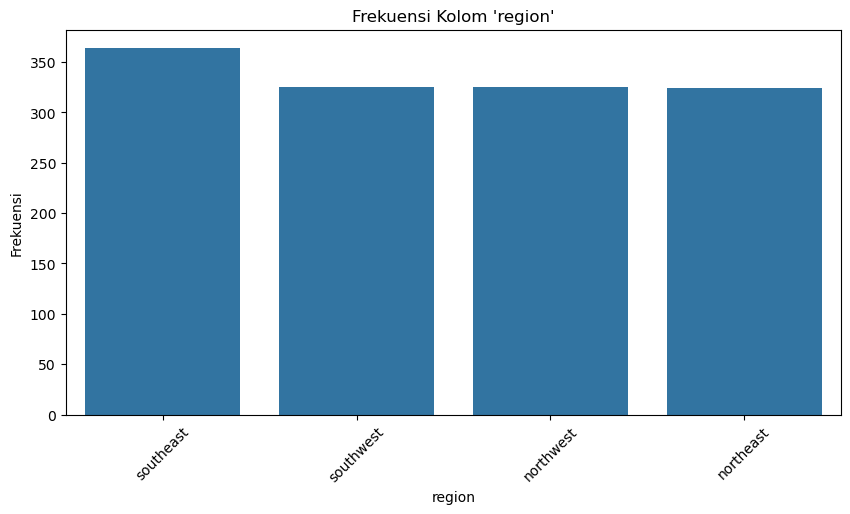

Kolom 'region' memiliki 4 nilai unik (Tipe: Object)


Analisis untuk Kolom: 'charges'


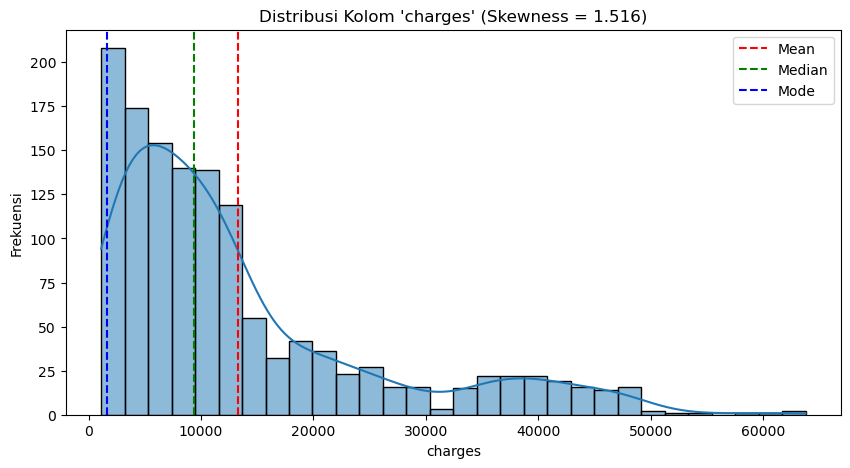

Distribusi Kolom 'charges': Tidak Normal (Skewness = 1.516)


In [69]:
# Cek distribusi untuk setiap kolom
for column in df.columns:
    cek_distribusi(df[column])

## Deteksi Missing Values

In [70]:
# Cek missing values
cek_missing_values(df)


Analisis Missing Values:
Tidak ada nilai yang hilang dalam DataFrame.


## Deteksi Outlier



Analisis Outlier untuk Kolom: 'age'
Distribusi Kolom 'age' dianggap normal (Skewness = 0.056)


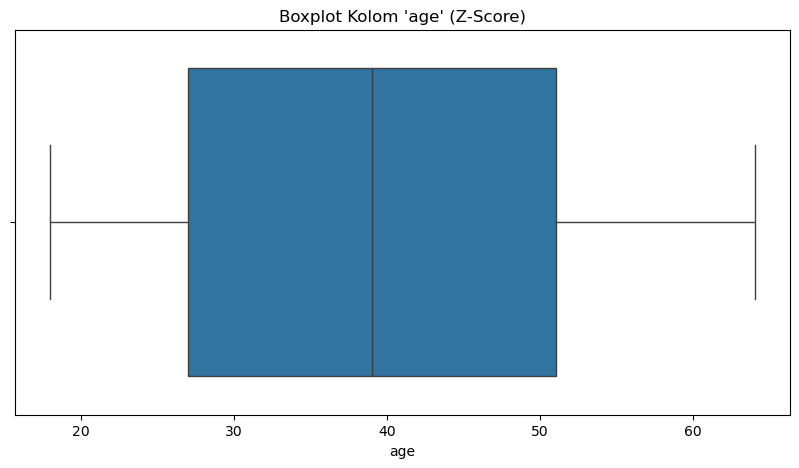

Jumlah Outlier (Z-Score): 0 dari 1338 total data
Persentase Outlier (Z-Score): 0.00%


Analisis Outlier untuk Kolom: 'bmi'
Distribusi Kolom 'bmi' dianggap normal (Skewness = 0.284)


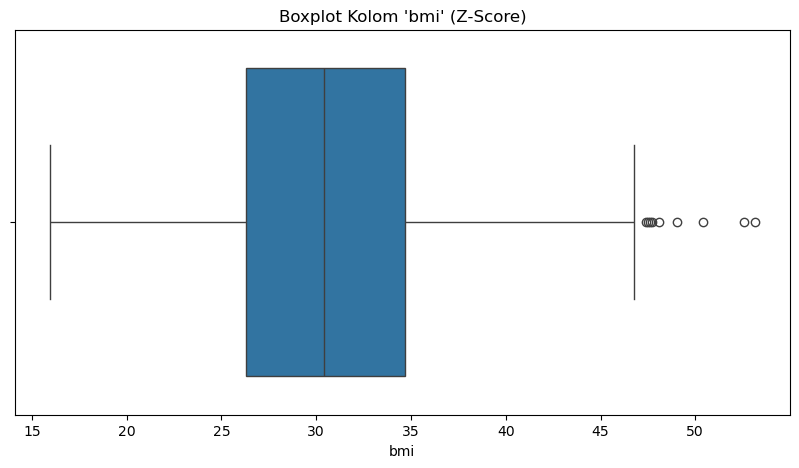

Jumlah Outlier (Z-Score): 4 dari 1338 total data
Persentase Outlier (Z-Score): 0.30%


Analisis Outlier untuk Kolom: 'children'
Distribusi Kolom 'children' tidak normal (Skewness = 0.938)


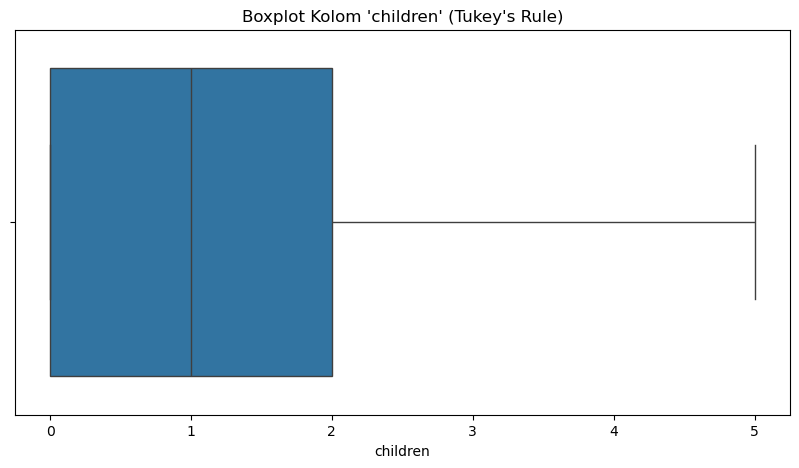

Jumlah Outlier (Tukey's Rule): 0 dari 1338 total data
Persentase Outlier (Tukey's Rule): 0.00%


Analisis Outlier untuk Kolom: 'charges'
Distribusi Kolom 'charges' tidak normal (Skewness = 1.516)


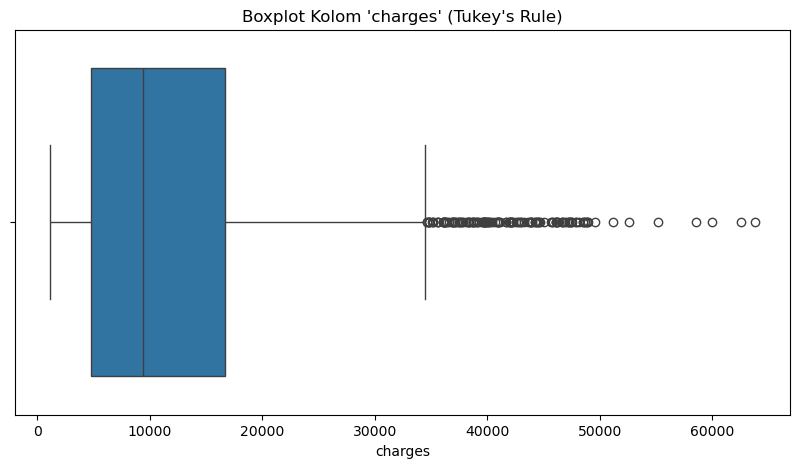

Jumlah Outlier (Tukey's Rule): 139 dari 1338 total data
Persentase Outlier (Tukey's Rule): 10.39%


In [71]:
for column_name in df.select_dtypes(include=[np.number]).columns:
    cek_outlier(df[column_name])

In [72]:
duplicates, total_duplicates = check_duplicates(df)
print(f"Total duplicates: {total_duplicates}")
duplicates

Total duplicates: 1


,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


## EDA Summary

In [73]:
result = analisis_kolom(df)
result

,Kolom,Jumlah Missing,Persentase Missing,Jumlah Outlier,Persentase Outlier,Distribusi
0,age,0,0.0,0,0.00,Normal
1,sex,0,0.0,0,0.00,2 Nilai Unik
2,bmi,0,0.0,4,0.30,Normal
3,children,0,0.0,0,0.00,Tidak Normal
4,smoker,0,0.0,0,0.00,2 Nilai Unik
5,region,0,0.0,0,0.00,4 Nilai Unik
6,charges,0,0.0,139,10.39,Tidak Normal


# Feature Engineering

## Feature Creation

### Discretization

#### Grouping Age

Mengelompokkan usia menjadi kategori:
| Age Range  | Category |
|------------|----------|
| 18 - 30    | Young    |
| 31 - 45    | Adult    |
| > 45       | Senior   |

In [74]:
# Define conditions for Age ranges
conditions = [
    (df['age'] >= 18) & (df['age'] <= 30),
    (df['age'] >= 31) & (df['age'] <= 45),
    (df['age'] > 45)
]

# Define the corresponding categories
choices = ['young', 'adult', 'senior']

# Apply the conditions to create the age_Category column
df['age_category'] = np.select(conditions, choices)

df

,age,sex,bmi,children,smoker,region,charges,age_category
0,19,female,27.900,0,yes,southwest,16884.92400,young
1,18,male,33.770,1,no,southeast,1725.55230,young
2,28,male,33.000,3,no,southeast,4449.46200,young
3,33,male,22.705,0,no,northwest,21984.47061,adult
4,32,male,28.880,0,no,northwest,3866.85520,adult
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,senior
1334,18,female,31.920,0,no,northeast,2205.98080,young
1335,18,female,36.850,0,no,southeast,1629.83350,young
1336,21,female,25.800,0,no,southwest,2007.94500,young


#### Grouping BMI

Mengelompokkan BMI menjadi kategori:
| BMI Range         | Category         |
|-------------------|------------------|
| Below 18.5        | Underweight       |
| 18.5—24.9         | Healthy Weight    |
| 25.0—29.9         | Overweight        |
| 30.0 and Above    | Obesity           |


In [75]:
# Define conditions for BMI ranges
conditions = [
    (df['bmi'] < 18.5),  # Underweight
    (df['bmi'] >= 18.5) & (df['bmi'] < 25.0),  # Healthy Weight (changed <= 24.9 to < 25.0 for clarity)
    (df['bmi'] >= 25.0) & (df['bmi'] < 30.0),  # Overweight (changed <= 29.9 to < 30.0 for clarity)
    (df['bmi'] >= 30.0)  # Obesity
]

# Define the corresponding categories
choices = ['underweight', 'healthy', 'overweight', 'obesity']

# Apply the conditions to create the BMI_Category column
df['bmi_category'] = np.select(conditions, choices)

df

,age,sex,bmi,children,smoker,region,charges,age_category,bmi_category
0,19,female,27.900,0,yes,southwest,16884.92400,young,overweight
1,18,male,33.770,1,no,southeast,1725.55230,young,obesity
2,28,male,33.000,3,no,southeast,4449.46200,young,obesity
3,33,male,22.705,0,no,northwest,21984.47061,adult,healthy
4,32,male,28.880,0,no,northwest,3866.85520,adult,overweight
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,senior,obesity
1334,18,female,31.920,0,no,northeast,2205.98080,young,obesity
1335,18,female,36.850,0,no,southeast,1629.83350,young,obesity
1336,21,female,25.800,0,no,southwest,2007.94500,young,overweight


### Cardinality

In [76]:
pd.set_option('display.max_colwidth', None)

cat_cols = list(df.select_dtypes(include='object').columns)

listItem = []
for col in cat_cols:
  listItem.append([col, df[col].nunique(), df[col].unique()])

pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique', 'nilai unique'], data=listItem)

,nama kolom,jumlah nilai unique,nilai unique
0,sex,2,"[female, male]"
1,smoker,2,"[yes, no]"
2,region,4,"[southwest, southeast, northwest, northeast]"
3,age_category,3,"[young, adult, senior]"
4,bmi_category,4,"[overweight, obesity, healthy, underweight]"


### Splitting Feature

#### Splitting Features and Target

In [77]:
#Splitting antara X (features) dan y (target)
X = df.drop(['charges'], axis = 1)
y = df['charges']
X

,age,sex,bmi,children,smoker,region,age_category,bmi_category
0,19,female,27.900,0,yes,southwest,young,overweight
1,18,male,33.770,1,no,southeast,young,obesity
2,28,male,33.000,3,no,southeast,young,obesity
3,33,male,22.705,0,no,northwest,adult,healthy
4,32,male,28.880,0,no,northwest,adult,overweight
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,senior,obesity
1334,18,female,31.920,0,no,northeast,young,obesity
1335,18,female,36.850,0,no,southeast,young,obesity
1336,21,female,25.800,0,no,southwest,young,overweight


In [78]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [79]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           1338 non-null   int64  
 1   sex           1338 non-null   object 
 2   bmi           1338 non-null   float64
 3   children      1338 non-null   int64  
 4   smoker        1338 non-null   object 
 5   region        1338 non-null   object 
 6   age_category  1338 non-null   object 
 7   bmi_category  1338 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 83.8+ KB


#### Splitting Between Train Set and Test Set

In [80]:
# Splitting training & testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
print('Train Size', X_train.shape)
print('Test Size', X_test.shape)

Train Size (1070, 8)
Test Size (268, 8)


## Feature Extraction

## Feature Transformation

### Outlier Handling

In [81]:
#check distribution form skewness
num_cols = list(X_train.select_dtypes(exclude='object').columns)

listItem= []

for col in num_cols:
  listItem.append([col, round(X_train[col].skew(),1), np.where(
    (round(X_train[col].skew(),1) <= 0.5) & (round(X_train[col].skew(),1) >= -0.5),
    'normal',
    'skewed')])

skewness = pd.DataFrame(columns=['nama kolom', 'nilai skewness', 'distribution'], data= listItem)
skewness

,nama kolom,nilai skewness,distribution
0,age,0.1,normal
1,bmi,0.3,normal
2,children,1.0,skewed


In [82]:
# Get upper, lower boundaries and percentage of outliers

column = []
lower_bound = []
upper_bound = []
percent_total_outlier = []

for row in range (0, len(skewness)):
  col = skewness['nama kolom'][row]
  #checking upper and lower boundary
  if skewness['distribution'][row] == 'skewed':
    IQR = X_train[col].quantile(0.75) - X_train[col].quantile(0.25)
    lower_boundary = X_train[col].quantile(0.25) - (IQR * 3)
    upper_boundary = X_train[col].quantile(0.75) + (IQR * 3)
  else:
    lower_boundary = X_train[col].mean() - 3* X_train[col].std()
    upper_boundary = X_train[col].mean() + 3* X_train[col].std()
  #append to list
  column.append(col)
  lower_bound.append(lower_boundary)
  upper_bound.append(upper_boundary)
  totout = ((len(X_train[X_train[col] > upper_boundary]) / len(X_train) * 100) + (len(X_train[X_train[col] < lower_boundary]) / len(X_train) * 100))
  percent_total_outlier.append(totout)

outliers = pd.DataFrame({
    'column': column,
    #round the value
    'upper_boundary': [round(upper_bound,2) for upper_bound in upper_bound],
    'lower_boundary': [round(lower_bound,2) for lower_bound in lower_bound],
    'percentage_total_outlier': [round(percent_total_outlier,2) for percent_total_outlier in percent_total_outlier]
})
outliers

,column,upper_boundary,lower_boundary,percentage_total_outlier
0,age,81.73,-3.79,0.00
1,bmi,49.11,12.40,0.19
2,children,8.00,-6.00,0.00


Tidak dilakukan handling outlier, 

In [83]:
#compare with column stats
X_train.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
age,1070.0,38.97,14.25,18.00,26.0,39.0,51.0,64.00
bmi,1070.0,30.76,6.12,16.82,26.3,30.5,34.8,53.13
children,1070.0,1.07,1.19,0.00,0.0,1.0,2.0,5.00


### Missing Values Handling

In [84]:
X_train.isnull().sum()

age             0
sex             0
bmi             0
children        0
smoker          0
region          0
age_category    0
bmi_category    0
dtype: int64

In [85]:
X_test.isnull().sum()

age             0
sex             0
bmi             0
children        0
smoker          0
region          0
age_category    0
bmi_category    0
dtype: int64

### Feature Scaling

### Feature Encoding

## Feature Selection

In [86]:
# Get numeric and categorical column

num_columns = X_train.select_dtypes(include = np.number).columns.tolist()

cat_columns = X_train.select_dtypes(include = ['object']).columns.tolist()

print('Numeric Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numeric Columns :  ['age', 'bmi', 'children']
Categorical Columns :  ['sex', 'smoker', 'region', 'age_category', 'bmi_category']


In [87]:
#split numerical and categorical columns

X_train_num = X_train[num_columns]
X_test_num = X_test[num_columns]

X_train_cat = X_train[cat_columns]
X_test_cat = X_test[cat_columns]

X_train_num

,age,bmi,children
161,18,36.850,0
1032,30,27.930,0
151,48,29.700,0
759,18,38.170,0
362,19,21.700,0
...,...,...,...
278,59,31.790,2
432,42,26.900,0
1283,18,30.030,1
1265,64,23.760,0


In [88]:
X_train_cat

,sex,smoker,region,age_category,bmi_category
161,female,yes,southeast,young,obesity
1032,female,no,northeast,young,overweight
151,male,no,southeast,senior,overweight
759,male,yes,southeast,young,obesity
362,female,yes,southwest,young,healthy
...,...,...,...,...,...
278,male,no,southeast,senior,obesity
432,male,no,southwest,adult,overweight
1283,male,no,southeast,young,obesity
1265,male,yes,southeast,senior,healthy


In [89]:
#get numerical and categorical columns yang udah fix

num_columns = X_train_num.columns.tolist()
cat_columns = X_train_cat.columns.tolist()

print('Num columns : ', num_columns)
print('Cat columns : ', cat_columns)

Num columns :  ['age', 'bmi', 'children']
Cat columns :  ['sex', 'smoker', 'region', 'age_category', 'bmi_category']


In [90]:
from scipy.stats import kendalltau, pearsonr

# Feature selection Numerical columns
p_values = []
interpretasi = []
cols = []

for col in X_train_cat.columns:
  corr_coef, p_value = kendalltau(X_train_cat[col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('ga ada korelasi')

pd.DataFrame({'nama kolom':cols,
              'p-value' : p_value,
              'hasil': interpretasi})

,nama kolom,p-value,hasil
0,sex,0.251704,ga ada korelasi
1,smoker,0.251704,ada korelasi
2,region,0.251704,ga ada korelasi
3,age_category,0.251704,ada korelasi
4,bmi_category,0.251704,ga ada korelasi


In [91]:
# Feature selection Numerical columns
p_values = []
interpretasi = []
cols = []

for col in X_train_num.columns:
  corr_coef, p_value = pearsonr(X_train_num[col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('ga ada korelasi')

pd.DataFrame({'nama kolom':cols,
              'p-value' : p_value,
              'hasil': interpretasi})

,nama kolom,p-value,hasil
0,age,0.014935,ada korelasi
1,bmi,0.014935,ada korelasi
2,children,0.014935,ada korelasi
